<a href="https://colab.research.google.com/github/mariachurches/AprendizajeSupervisado/blob/main/Enunciado_C1_P1/Actividad_C1_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convocatoria 1 - Proyecto 1

#### 0) Cargar una de las imágenes histológicas

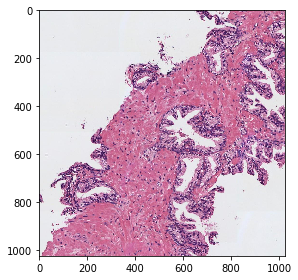

In [67]:
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB.
# Normalizar la imagen para que los píxeles se encuentren en el rango [0, 1]
# Visualizar la imagen
from skimage import io
from sklearn import preprocessing
import numpy as np

# Carga de datos.
img = io.imread("/content/histo_1.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Limpieza de datos: normalización.
X_train = img/255

# Salida de resultados.
io.imshow(X_train)
io.show()

#### 1) Realizar una transformación de color para convertir la imagen al espacio de color CMYK

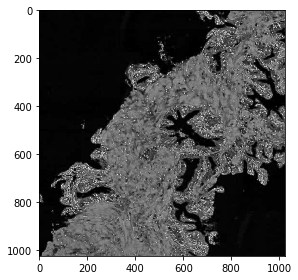

In [68]:
# Extraer la componente magenta de la imagen (que corresponde a la región tisular)
# Visualizar la imagen del canal magenta

with np.errstate(invalid='ignore', divide='ignore'):
    K = 255 - np.max(X_train, axis=2)
    C = (255-X_train[...,0] - K)/(255-K)
    M = (255-X_train[...,1] - K)/(255-K)
    Y = (255-X_train[...,2] - K)/(255-K)
    
# Salida de resultados.
io.imshow(M)
io.show()

#### 2) Umbralizar la imagen para separar los píxeles del fondo de la región tisular

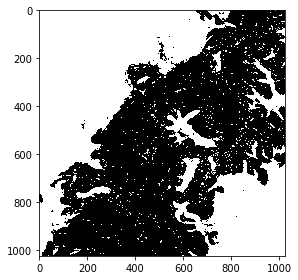

In [85]:
# Aplicar un filtro gaussiano de tamaño 5x5 y después utilizar el método de Otsu de manera que
# los píxeles correspondientes al lumen y al background de la imagen sean 1s y el resto de los píxeles tengan un valor de 0.
# Nota: Recordar que el método de Otsu requiere como input una imagen en el rango [0-255] en formato "uint8".
# Visualizar la máscara resultante
import cv2

img_gaus = cv2.GaussianBlur(gray_img, (5,5), 0)
t, mask  = cv2.threshold(img_gaus,0,255,cv2.THRESH_OTSU) 
io.imshow(mask)
io.show()

#### 3) Limpiar la imagen eliminando los artefactos de lumen (objetos blancos pequeños que no son lúmenes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  """


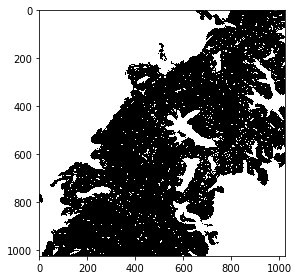

In [113]:
# Utilizar la librería skimage.morphology.remove_small_objects para eliminar aquellos objetos cuya área sea menor a 300 píxeles
# Más información en https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects
# Visualizaer la máscara resultante
from skimage import morphology
removed =  morphology.remove_small_holes(mask, 300)
io.imshow(removed)
io.show()

#### 4) Rellenar con 0s el fondo de la imagen para quedarnos únicamente con los lúmenes

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


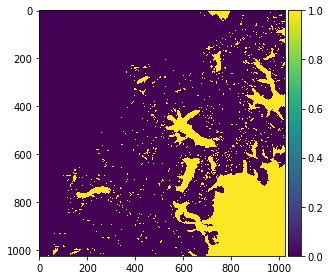

In [114]:
# Aplicar el algoritmo de expansión a partir de semillas (region growing) de manera que únicamente los lúmenes sean blancos
# y el resto de la imagen negra. Pista: utilizar dos semillas. Nota: Se pueden fijar las semillas de manera manual, pero
# se valorará positivamente a aquell@s que desarrollen una función para encontrarlas automáticamente.
# Visualizar la máscara resultante. 

expansion = removed.copy()
h, w = gray_img.shape
ref = np.zeros((h+2, w+2), np.uint8)
# Fijar la semilla. En este caso en la esquina superior izquierda (posición 0,0) para rellenar a partir de ahí
cv2.floodFill(expansion, ref, (0,0), 0) # Como nos interesa rellenar de negro, utilizamos el 0 en la última posición

io.imshow(expansion)
io.show()




#### 5) Rellenar los objetos de los lúmenes

In [ ]:
# Rellenar los lúmenes con la función binary_fill_holes de la librería scipy.ndimage.morphology
# Visualizar la máscara resultante

#### 6) Detectar y dibujar los contornos de los lúmenes sobre la imagen original

In [ ]:
# Dibujar los contornos de los lúmenes en color verde sobre la imagen original RGB. Nota: Utilizar los flags necesarios
# para que los contornos en verde sean perfectamente visibles. 
# Visualizar la imagen superpuesta

#### 7) Identificar y cropear el lumen más grande

In [ ]:
# Determinar cuál es el lumen de mayor área y hacer un crop del mismo sobre la imagen original RGB.
# Visualizar el lumen cropeado.

#### 8) Extraer 13 características geométricas que permitan caracterizar el lumen recortado 

In [ ]:
# Calcular las siguientes características del crop del lumen de mayor área, redondeando su valor hasta el cuarto decimal.
# 1) Área
# 2) Área de la bounding box
# 3) Área convexa
# 4) Exentricidad
# 5) Diámetro equivalente
# 6) Extensión
# 7) Diámetro Feret
# 8) Longitud del eje mayor
# 9) Longitud del eje menor
# 10) Orientación
# 11) Perímetro
# 12) Solidez
# 13) Compacidad